# Customizing the Axes

## Dealing with the too-many-tick-labels problem

In [6]:
import matplotlib.pyplot as plt
import numpy as np

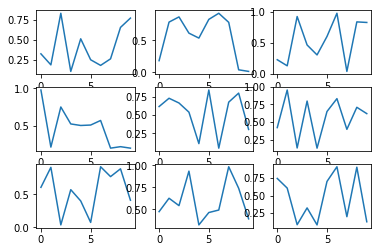

In [8]:
# often when you create lots-o-subplots, the tick labels overlap
fig, axes = plt.subplots(3,3)
for ax in axes.flat: ax.plot(np.random.rand(10))
    
axes.flat

### Using sharex and sharey to turn off redundant labels

If the axes share the same x-axis and y-axis, be definition the yticklabels in all but the first column are redundant, and all xticklabels in all but the last row are redundant.  `plt.subplots` is aware of this, and setting *sharex* and *sharey* to be True will turn off unneccsary ticks

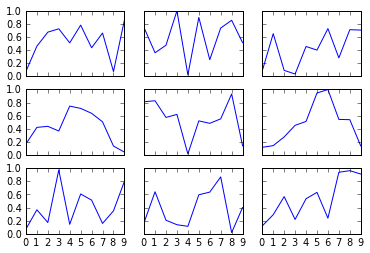

In [7]:
fig, axes = plt.subplots(3,3, sharex=True, sharey=True)
for ax in axes.flat: ax.plot(np.random.rand(10))

### Using tight layout to prevent overlap of labels *between* axes

If you want to preserve all the tick labels, but reduce overlap between axes, you can use the "tight layout' option to the figure.  This will prevent axis tick labels from overlapping other axes, but will not help with tick crowding on a single axis.  In the example below, we create and and y data that are not on the same scale, so we want to preserve.  We'll deal with the "too many ticks on a single axis" below.

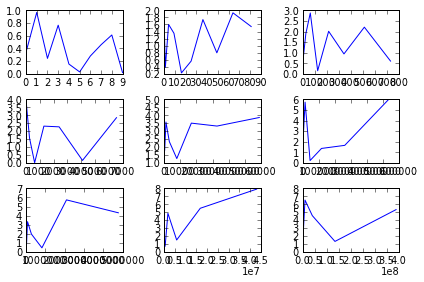

In [10]:
fig, axes = plt.subplots(3,3)
for i, ax in enumerate(axes.flat): 
    ax.plot(np.arange(10)**(i+1), (i+1)*np.random.rand(10))
fig.tight_layout()

### Use fewer ticks to prevent the overlap of ticks *within* and axes

The default matplotlib tick locator (more on tick locators below) is the [`matplotlib.ticker.MaxNLocator`](http://matplotlib.sf.net/api/ticker_api.html#matplotlib.ticker.MaxNLocator).  The MaxNLocator` will create at most N ticks, and try to place them in intelligent locations regardless of the scale of your data.  When creating lots-o-subplots, usually the number of ticks is too large, and you want to dial down the maximum number of ticks.  Sometimes just 3 or 4 is enough for plots with many subplots.

`ax.locator_params` is a convenience method for customizing the default tick locator, and only works with the `MaxNLocator` (if you have set a custom locator instance this method will not work).  Some of the useful options to this command

*axis* : 'both' | 'x' | 'y'
    apply changes to the x-axis, y-axis or both

*nbins* : integer
    use at most *nbins*+1 ticks
   
*tight* : True|False Set the view limits of the axis equal to the data limits (no excess white-space).  When tight is False (the default) the axis limits will try and a min/max that are nice, round numbers.  For example, if your data fall in the range [0.5, 0.95], if *tight* is False the axis view limits will be [0,1] and if *tight* is True the default view limits will be [0.05, 0.95])

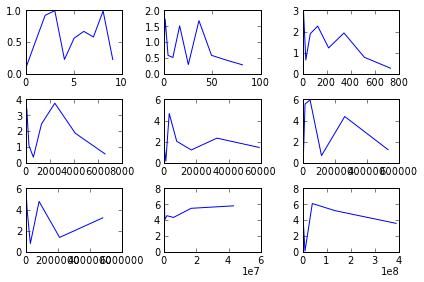

In [19]:
fig, axes = plt.subplots(3,3)
for i, ax in enumerate(axes.flat): 
    ax.plot(np.arange(10)**(i+1), (i+1)*np.random.rand(10))
    ax.locator_params(axis='both', nbins=4)  # axis can be 'x', 'y' or 'both'
    fig.tight_layout()

The example above is *almost* usable,except the length of the ticks is too long for the ticks with an order of magnitude 1e3.  The default matplotlib tick formatter is a [`matplotlib.ticker.ScalarFormatter`](http://matplotlib.sf.net/api/ticker_api.html#matplotlib.ticker.ScalarFormatter) which will fall back to scientific notation if the tick location values fall outside of a certain range.  By default this is [1e-7, 1e7] but this range can be controlled in code or the defaults can be changed in the [matplotlibrc file](http://matplotlib.sf.net/users/customizing.html) using the `axes.formatter.limits` rc parameter.  Below, we will set the scalar formatting limit to [1e-3, 1e3] so that the tick label representations will be more compact.

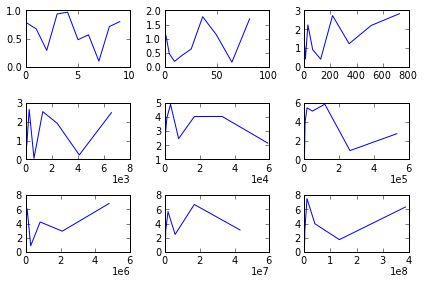

In [15]:
fig, axes = plt.subplots(3,3)
for i, ax in enumerate(axes.flat): 
    ax.plot(np.arange(10)**(i+1), (i+1)*np.random.rand(10))
    ax.locator_params(axis='both', nbins=4)  # axis can be 'x', 'y' or 'both'
    ax.ticklabel_format(scilimits=(-3,3)) # use scientific limits above 1e3
    fig.tight_layout()

### ggplot styles

Show how to make a plot layout that resembes the R gg plot style

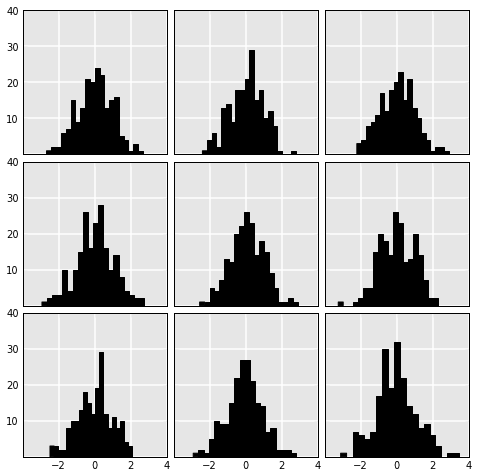

In [25]:
fig, axes = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(8,8))
gray = (0.9, 0.9, 0.9)

class DropFormatter(ticker.ScalarFormatter):
    def __call__(self, x, pos=None):
        if pos==0: return ''
        return ticker.ScalarFormatter.__call__(self, x, pos=None)

for ax in axes.flat:
    ax.locator_params(nbins=5)
    ax.patch.set_facecolor(gray)
    ax.patch.set_edgecolor(gray)
    ax.grid()
    ax.hist(np.random.randn(200), 20, facecolor='k')
    ax.xaxis.grid(color='white', linestyle='-', linewidth=1.5)
    ax.yaxis.grid(color='white', linestyle='-', linewidth=1.5)
    ax.xaxis.set_major_formatter(DropFormatter())
    ax.yaxis.set_major_formatter(DropFormatter()) 
    ax.set_axisbelow(True)
    
    for line in ax.xaxis.get_ticklines() + ax.yaxis.get_ticklines():
        line.set_color(gray)
    
    
    fig.subplots_adjust(wspace=0.05, hspace=0.05)

*tight* : True|False Set the view limits of the axis equal to the data limits (no excess white-space).  When tight is False (the default) the axis limits will try and a min/max that are nice, round numbers.  For example, if your data fall in the range [0.5, 0.95], if *tight* is False the axis view limits will be [0,1] and if *tight* is True the default view limits will be [0.05, 0.95])

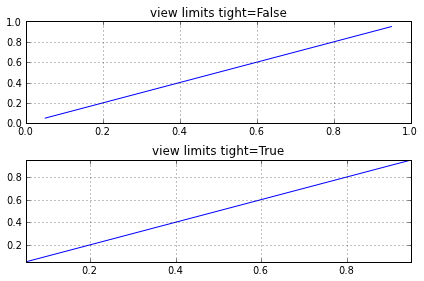

In [22]:
fig, axes = plt.subplots(2)

axes[0].plot([0.05, 0.95], [0.05, 0.95])
axes[0].locator_params(tight=False)
axes[0].set_title('view limits tight=False')
axes[0].grid(True)

axes[1].plot([0.05, 0.95], [0.05, 0.95])
axes[1].locator_params(tight=True)
axes[1].set_title('view limits tight=True')
axes[1].grid(True)

# note that tight layout on a figure is a different 
# concept that tight viewlimits.  setting the figure 
# to tight_layout prevents overlapping text between 
# axes
fig.tight_layout()

### Controlling tick visibility manually

In the examples above, we use [`plt.subplots`](http://matplotlib.sf.net/api/pyplot_api.html#matplotlib.pyplot.subplots) to automatically create aligned subplots with shares axes and redundant tick labels turned off.  When placing axes manually ourselves, we need to use API calls to replicate that functionality.

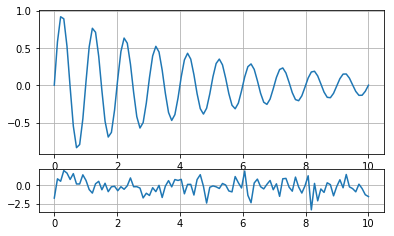

In [10]:
fig = plt.figure()
# create two axes of different heights ,one over the other
ax1 = fig.add_axes([0.1, 0.3, 0.8, 0.5])
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.15], sharex=ax1)
ax1.grid(True)
ax2.grid(True)

t = np.linspace(0, 10, 100)
ax1.plot(t, np.exp(-t/5) * np.sin(2*np.pi*t))
ax2.plot(t, np.random.randn(len(t)))

You can access the x or y ticklabel instances with `ax.get_xticklabels` and `ax.get_yticklabels`.  These methods return a list of `matplotlib.text.Text` instances on which you can use API methods to tweak everything from their visility state or rotation to their font style, size, color.  In the example below, we just turn the visibility x-tick labels of the upper panel by using the `Artist.set_visible` method (every object in an mpl `Figure` has this method.  

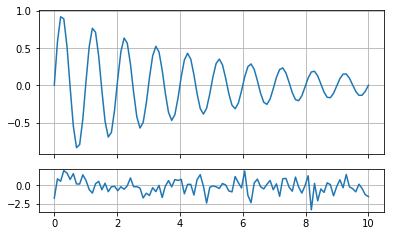

In [11]:
# turn off the redundant tick labels in the upper panel
for label in ax1.get_xticklabels():
    label.set_visible(False)
    
display(fig)

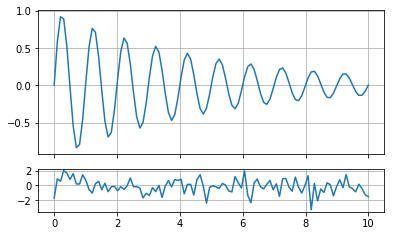

In [12]:
# reduce the number of labels in the lower y-axis
ax2.locator_params(nbins=3, axis='y')
display(fig)

Additionally, the axes has some helper methods when working with a grid of subplots to selectively handle the first or last column or row.  Here we'll get a little crazy, rotating the first column text 45 degress and making it red, and enlarging the last row labels and make them blue.

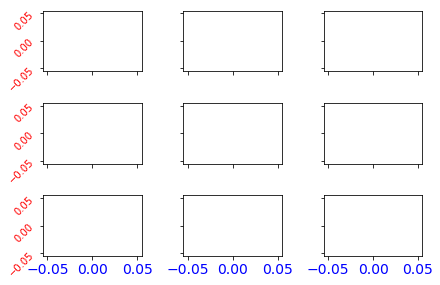

In [13]:
fig, axes = plt.subplots(3,3)
fig.tight_layout()

for ax in axes.flat:
    ax.locator_params(nbins=4)
    
    if ax.is_first_col():
         # red and rotated
        for label in ax.get_yticklabels():
            label.set_rotation(45)
            label.set_color('red')
    else:
        # invisible
        for label in ax.get_yticklabels():
            label.set_visible(False)
        
    if ax.is_last_row():
        # big and blue
        for label in ax.get_xticklabels():
            label.set_size(14)
            label.set_color('blue')
    else: 
        for label in ax.get_xticklabels():
            label.set_visible(False)

## Packing axes with VBox and Hbox

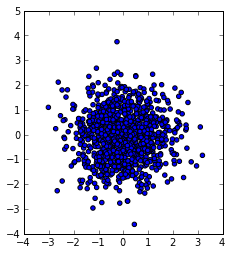

In [46]:
# the random data
x, y = np.random.randn(2, 1000)

fig, axScatter = plt.subplots(1)

# the scatter plot:
axScatter = plt.subplot(111)
axScatter.scatter(x, y)
axScatter.set_aspect(1.)

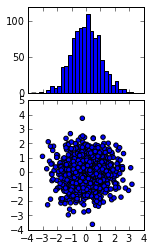

In [47]:
# create new axes on the right and on the top of the current axes
# The first argument of the new_vertical(new_horizontal) method is
# the height (width) of the axes to be created in inches.

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(axScatter)
axHistx = divider.append_axes("top", 1.2, pad=0.1, sharex=axScatter)
# now determine nice limits by hand:
binwidth = 0.25
xymax = np.max( [np.max(np.fabs(x)), np.max(np.fabs(y))] )
lim = ( int(xymax/binwidth) + 1) * binwidth

bins = np.arange(-lim, lim + binwidth, binwidth)
axHistx.hist(x, bins=bins)

# turn off redundant x tick labels
for tl in axHistx.get_xticklabels():
    tl.set_visible(False)

axHistx.set_yticks([0, 50, 100])

display(fig)

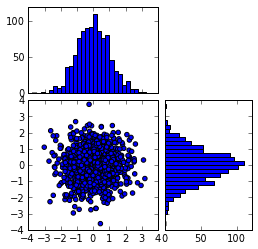

In [48]:
axHisty = divider.append_axes("right", 1.2, pad=0.1, sharey=axScatter)
axHisty.hist(y, bins=bins, orientation='horizontal')

# the xaxis of axHistx and yaxis of axHisty are shared with axScatter,
# thus there is no need to manually adjust the xlim and ylim of these
# axis.


for tl in axHisty.get_yticklabels():
    tl.set_visible(False)

axHisty.set_xticks([0, 50, 100])

display(fig)

## Sophisticated axes layout with gridspec

[gridspec](http://matplotlib.sf.net/users/gridspec.html) is a sophisticated layout tool for matplotlib axes that goes far beyond the standard subplot model which forces your axes into a grid of rows by columns.  Gridspec allows you to create axes that span multiple rows and columns, and even place sophisticated layouts within a single axes region.  There are two ways to use gridspec: with the pyplot helper function [`plt.subplot2grid`](http://matplotlib.sf.net/api/pyplot_api.html#matplotlib.pyplot.subplot2grid) or using the [`matplotlib.gridspec'](http://matplotlib.sf.net/api/gridspec_api.html) API.

The basic syntax of `subplot2grid`` is like the standard `subplot` creation, except that the indexing is zero based and is two dimensional.  For example, to create the equivalent of `subplot(221)` with gridspec, you would write:

  ax = plt.subplot2grid((2,2),(0, 0))

The second argument means the axes refers to the first row and column of a 2x2 grid of axes.  What makes gridspec useful is its ability to support spans.  For example, we could imagine the 2-D histogram above with the marginal 1D x and y histograms, as a 3x3 grid where the 2D histogram spans rows 2 and 3 and columns 3 and 3, and the marginal densities occupy just one cell in the 3x3 grid.

In [16]:
# this is a helper utility function for prettifying and labeling the axes 
# generated by the gridspec examples below 

def make_ticklabels_invisible(fig):
    'turn off tick labels and label the axes w/ text'    
    for i, ax in enumerate(fig.axes):
        ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center", size=20)
        for tl in ax.get_xticklabels() + ax.get_yticklabels():
            tl.set_visible(False)

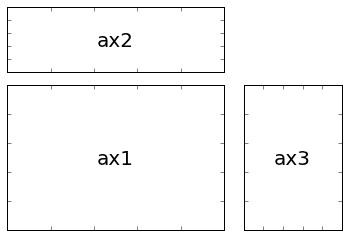

In [17]:
fig = plt.figure()

# create the layout above using gridspec
# ax1 starts at row 1 and column 0 and spans two rows and two columns
ax1 = plt.subplot2grid((3,3), (1, 0), colspan=2, rowspan=2)

# ax2 starts at row 0 and column 0 and spans two columns
ax2 = plt.subplot2grid((3,3), (0, 0), colspan=2)

# ax3 starts at row 1 and column 2 and spans 2 rows
ax3 = plt.subplot2grid((3,3), (1, 2), rowspan=2)

make_ticklabels_invisible(fig)

The API gridspec object also support numpy style array indexing and slicing, so you can slice across a gridspec object to indicate a row or column span.  Here is a more sophisticated example.  Here you create a GridSpec object which supports array slicing and indexing and you can pass these slices into the `plt.subplot` command to create your axes.

In [19]:
import matplotlib.gridspec as gridspec

fig = plt.figure()

gs = GridSpec(3, 3)
ax1 = plt.subplot(gs[0, :])
# identical to ax1 = plt.subplot(gs.new_subplotspec((0,0), colspan=3))
ax2 = plt.subplot(gs[1,:-1])
ax3 = plt.subplot(gs[1:, -1])
ax4 = plt.subplot(gs[-1,0])
ax5 = plt.subplot(gs[-1,-2])

make_ticklabels_invisible(fig)

NameError: name 'GridSpec' is not defined

<Figure size 432x288 with 0 Axes>

## Custom tick formatting and locating

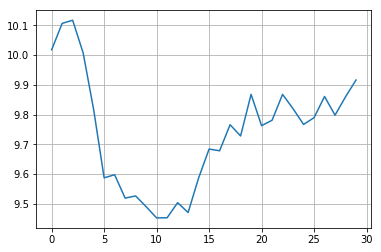

In [18]:
import matplotlib.ticker as ticker

# a random walk
prices = (1 + 0.01*np.random.randn(30)).cumprod() * 10
fig, ax = plt.subplots(1)
ax.plot(prices)
ax.grid()

# format the y tick labels as dolllars
#ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('$%.2f'))

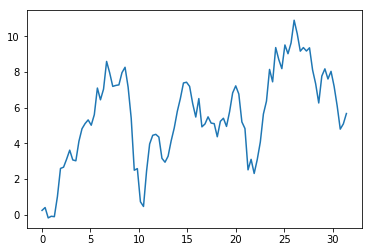

In [14]:
import matplotlib.ticker as ticker
x = np.linspace(0, 10*np.pi, 100)
y = np.random.randn(len(x)).cumsum()
fig, ax = plt.subplots(1)
ax.plot(x, y)

# place x-ticks on the integer multiples of pi
class PiLocator(ticker.Locator):

    def __call__(self):
        vmin, vmax = self.axis.get_view_interval()
        imin = np.ceil(vmin/np.pi)
        imax = np.floor(vmax/np.pi)
        return np.arange(imin, imax)*np.pi

class PiFormatter(ticker.Formatter):
    def __call__(self, x, pos=None):
        i = int(x/np.pi)
        return r'$%d\pi$'%i

# uncomment for custom locator and formatter
#ax.xaxis.set_major_locator(PiLocator())
#ax.xaxis.set_major_formatter(PiFormatter())
#ax.fmt_xdata = lambda x: '%.4f'%x